# Binary Yukawa Mixture Simulation

In this notebook we will simulate a binary yukawa mixture.

In [2]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess
from sarkas.tools.transport import TransportCoefficient

# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas','examples'))

input_file_name = os.path.join(example_directory, 'ybim_mks_pp.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Pre Simulation Testing

In [4]:
preproc = PreProcess(input_file_name)
preproc.setup(read_yaml=True)







________             ______                
__  ___/_____ __________  /_______ ________
_____ \_  __ `/_  ___/_  //_/  __ `/_  ___/
____/ // /_/ /_  /   _  ,<  / /_/ /_(__  ) 
/____/ \__,_/ /_/    /_/|_| \__,_/ /____/  
                                           


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  CO_mks_pp
Job directory:  Simulations/CO_mks_pp
Equilibration dumps directory:  Simulations/CO_mks_pp/Equilibration/dumps
Production dumps directory:  Simulations/CO_mks_pp/Production/dumps

Units:  mks
Total No. of particles =  1000

Particle Species:
No. of species =  2
Species 1 : C
	Species ID: 0
	No. of particles = 500 
	Number density = 1.000000e+30 [N/m^3]
	Mass = 2.008986e-26 [kg]
	Charge = 9.613060e-19 [C]
	Temperature = 1.020000e+05 [K]
Species 2 : O
	Species ID: 1
	No. of particles = 500 
	Number density = 1.000000e+30 [N/m^3]
	Mass = 2.676195e-26 [kg]
	Charge =

In [5]:
preproc.run(timing=True, loops = 30, postprocessing=True)



====================== Times Estimates ===========================

Time of PP acceleration calculation averaged over 30 steps: 
0 min 0 sec 14 msec 295 usec 511 nsec 


Running 30 equilibration and production steps to estimate simulation times




Time of a single equilibration step averaged over 30 steps: 
0 min 0 sec 35 msec 549 usec 628 nsec 




Time of a single production step averaged over 30 steps: 
0 min 0 sec 16 msec 261 usec 322 nsec 



----------------- Total Estimated Times -----------------------

Equilibration Time: 0 hrs 2 min 57 sec

Production Time: 0 hrs 8 min 7 sec

Total Run Time: 0 hrs 11 min 5 sec


===================== Post Processing ============================

Radial Distribution Function:
No. bins = 250
dr = 0.0240 a_ws = 1.1817e-12 [m]
Maximum Distance (i.e. potential.rc)= 6.0000 a_ws = 2.9542e-10 [m]

Static Structure Factor:
No. of ka harmonics = n_x, n_y, n_z = 10, 10, 10
No. of ka values to calculate = 1330
Smallest wavevector k_min = 3.9 / N^(1/3)
k_min = 0.3898 / a_ws = 1.2599e+09 [1/m]
Largest wavevector k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
k_max = 6.7511 / a_ws = 2.1822e+10 [1/m]

Dynamic Structure Factor:
Frequency Constants
	No. of slices = 2
	No. steps per slice = 3000
	No. dumps per slice = 600
	Frequency step dw = 2 pi (no_slices * prod_dump_step)/(production_steps * dt)
	dw = 0

In [6]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True, other_inputs=)
sim.run()








     _______.     ___      .______       __  ___      ___           _______.
    /       |    /   \     |   _  \     |  |/  /     /   \         /       |
   |   (----`   /  ^  \    |  |_)  |    |  '  /     /  ^  \       |   (----`
    \   \      /  /_\  \   |      /     |    <     /  /_\  \       \   \    
.----)   |    /  _____  \  |  |\  \----.|  .  \   /  _____  \  .----)   |   
|_______/    /__/     \__\ | _| `._____||__|\__\ /__/     \__\ |_______/    
                                                                            


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  CO_mks_pp
Job directory:  Simulations/CO_mks_pp
Equilibration dumps directory:  Simulations/CO_mks_pp/Equilibration/dumps
Production dumps directory:  Simulations/CO_mks_pp/Production/dumps

Units:  mks
Total No. of particles =  1000

Particle Species:
No. of species =  2
Species 1 : C
	Species ID: 0
	



Equilibration Time: 0 hrs 1 min 15 sec

------------- Production -------------




Production Time: 0 hrs 8 min 42 sec

Total Time: 0 hrs 9 min 57 sec


In [7]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

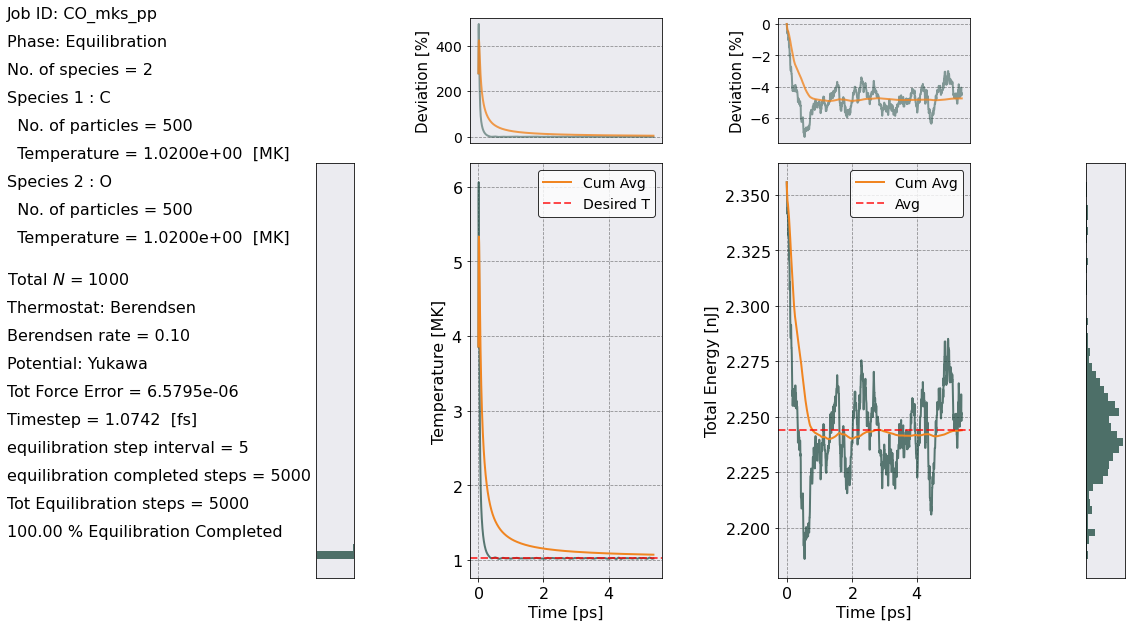

In [8]:
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc,phase="equilibration")

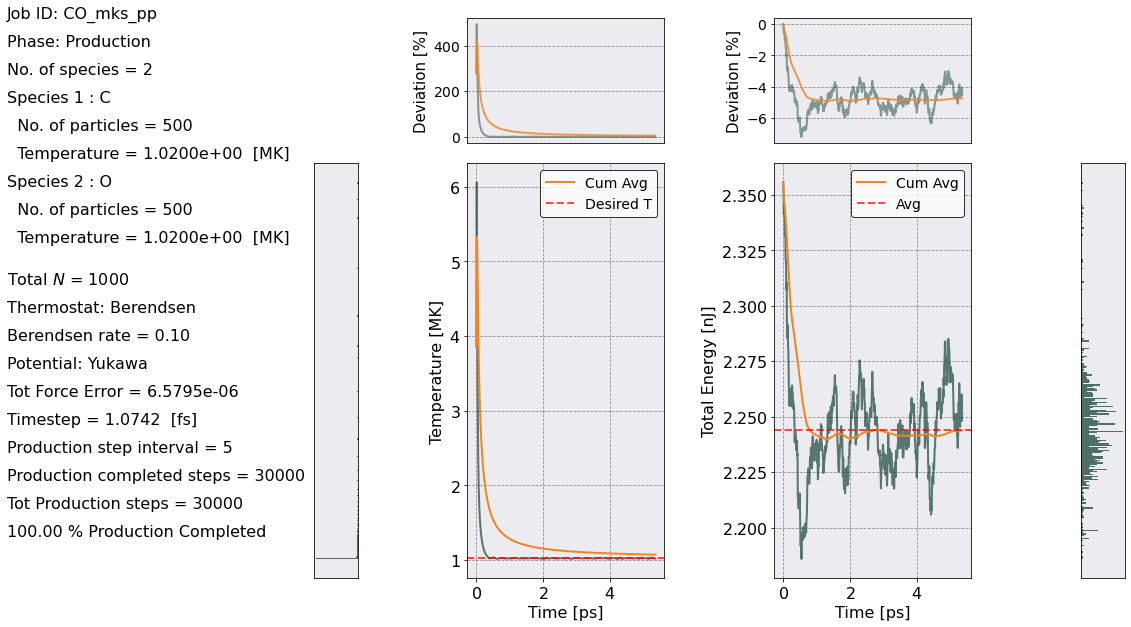

In [9]:
postproc.therm.temp_energy_plot(postproc, phase = 'Production')

In [8]:
postproc.dsf.setup(postproc.parameters)
postproc.dsf.compute()

Calculating n(k,t).


  0%|          | 0/3000 [00:00<?, ?it/s]

Calculating n(k,t).


  0%|          | 0/3000 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Frequencies'>

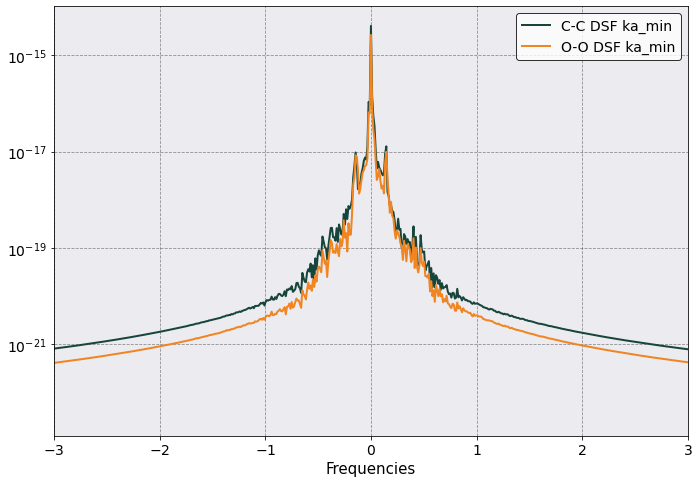

In [9]:
postproc.dsf.plot(normalization= postproc.dsf.total_plasma_frequency, 
                  y = ['C-C DSF ka_min', 'C-O DSF ka_min', 'O-O DSF ka_min'],
                 logy = True,
                 xlim = (-3, 3))

In [10]:
postproc.ssf.setup(postproc.parameters)
postproc.ssf.compute()

Calculating n(k,t).



Calculating n(k,t).



Calculating S(k)


In [11]:
postproc.ssf.dataframe.head()

,ka values,C-C SSF,C-C SSF Errorbar,C-O SSF,C-O SSF Errorbar,O-O SSF,O-O SSF Errorbar
0,0.389778,0.672774,0.177074,-0.523842,0.134409,0.438256,0.122420
1,0.551229,0.496672,0.352699,-0.383922,0.281556,0.324865,0.235236
2,0.675115,0.663406,0.555651,-0.496187,0.437840,0.418857,0.362565
3,0.779555,1.022014,0.431586,-0.804010,0.344027,0.664861,0.281762
4,0.871569,0.750997,0.407025,-0.592497,0.328938,0.499490,0.270744


<AxesSubplot:xlabel='$ka$'>

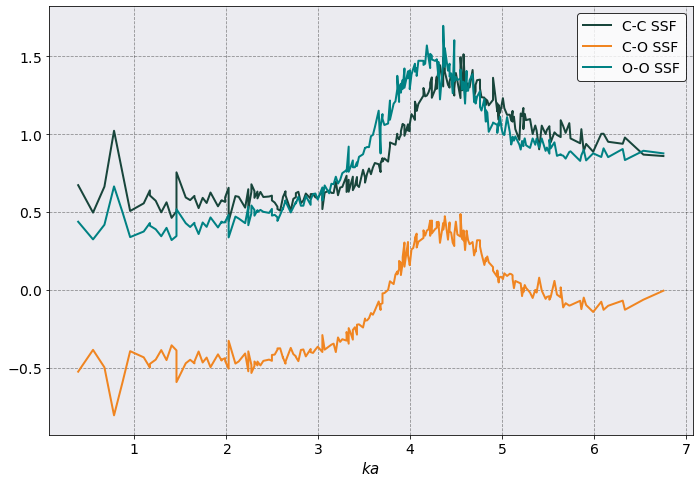

In [13]:
postproc.ssf.plot(y = ['C-C SSF','C-O SSF', 'O-O SSF'],
                 xlabel = r'$ka$')

In [14]:
from sarkas.tools.transport import TransportCoefficient

In [15]:
diffusion = TransportCoefficient.diffusion(postproc.parameters)


File Simulations/CO_mks_pp/PostProcessing/VelocityAutoCorrelationFunction/Production/VelocityACF_CO_mks_pp.csv not found!

Computing Observable now ...
Parsing particles' velocities.



Calculating vacf with time averaging off...


KeyboardInterrupt: 


File Simulations/CO_mks_pp/PostProcessing/DiffusionFluxAutoCorrelationFunction/Production/DiffusionFluxACF_CO_mks_pp.csv not found!

Computing Observable now ...
Parsing particles' velocities.



Calculating diffusion flux acf with time averaging off ...


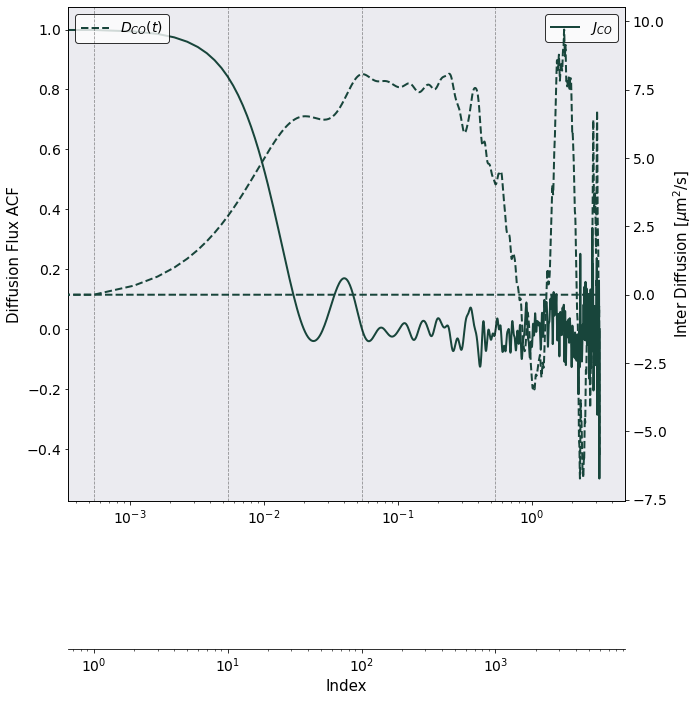

In [16]:
interdiffusion = TransportCoefficient.interdiffusion(postproc.parameters)

In [17]:
interdiffusion

,Time,C-C Inter Diffusion,C-O Inter Diffusion,O-O Inter Diffusion
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,5.370910e-17,0.000000e+00,0.000000e+00,0.000000e+00
2,1.074182e-16,4.426821e-09,3.323159e-09,2.494654e-09
3,1.611273e-16,8.839263e-09,6.635525e-09,4.981205e-09
4,2.148364e-16,1.322256e-08,9.926011e-09,7.451333e-09
...,...,...,...,...
5996,3.220398e-13,-7.821127e-08,-5.871222e-08,-4.407453e-08
5997,3.220935e-13,-7.857415e-08,-5.898463e-08,-4.427902e-08
5998,3.221472e-13,-7.884929e-08,-5.919117e-08,-4.443407e-08
5999,3.222009e-13,-7.904053e-08,-5.933474e-08,-4.454185e-08


Text(0, 0.5, '$D_{\\parallel,\\perp}$ [$\\omega_p a_{ws}^2$]')

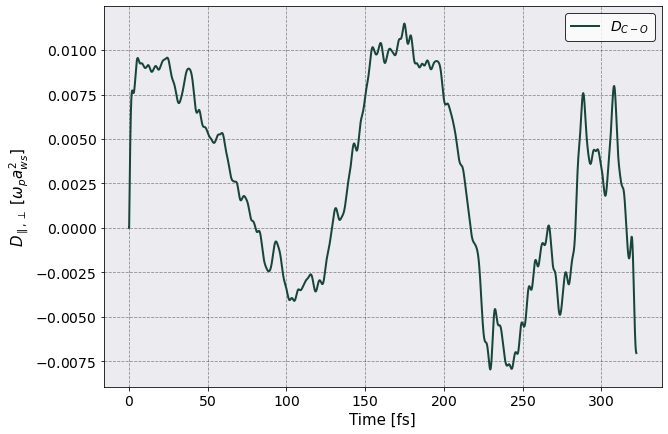

In [18]:
rescaling = postproc.parameters.total_plasma_frequency * postproc.parameters.a_ws**2

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(interdiffusion["Time"]*1e15, interdiffusion["C-O Inter Diffusion"]/rescaling,
       label = r'$D_{C-O}$')
ax.legend()
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$D_{\parallel,\perp}$ [$\omega_p a_{ws}^2$]')